In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Dropping irrelevant data
df.drop(['PassengerId', 'Name', 'Ticket','Fare', 'Cabin'], axis = 1, inplace = True)


In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [8]:
# checking the null values
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

Text(0, 0.5, 'Age')

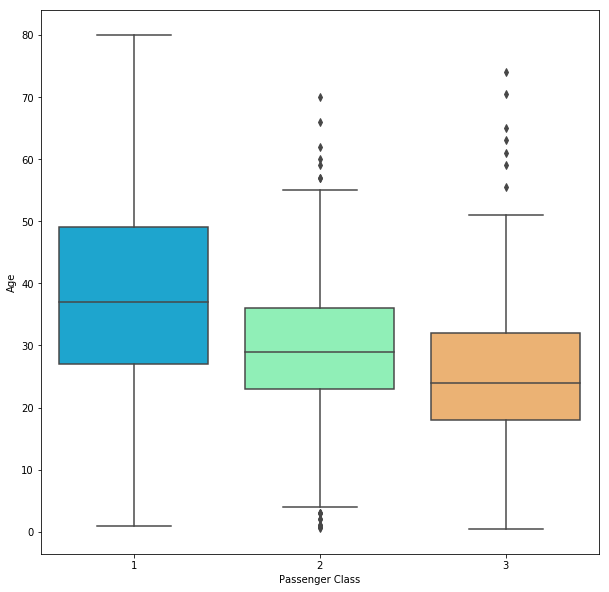

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Pclass',y='Age', data=df, palette='rainbow')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

In [10]:

df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [11]:
# filling na values using the mean 
def age_approx(col):
    Age = col[0]
    Pclass = col[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    

In [12]:
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis = 1)

In [13]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [14]:
# Since Embark has only  na values we can drop it
df.dropna(axis = 0, inplace = True)

In [15]:
# again checing for the null values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [16]:
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [17]:
# handling the categorical variables
gender = pd.get_dummies(df['Sex'], prefix = 'Sex', drop_first=True)

In [18]:
embark_loc = pd.get_dummies(df['Embarked'], prefix='Embark', drop_first=True)

In [19]:
#  dropping the categorical variables and replacing them with encoded ones
df.drop(['Sex', 'Embarked'], axis= 1, inplace=True)
df = pd.concat([df, gender, embark_loc], axis = 1)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_male,Embark_Q,Embark_S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


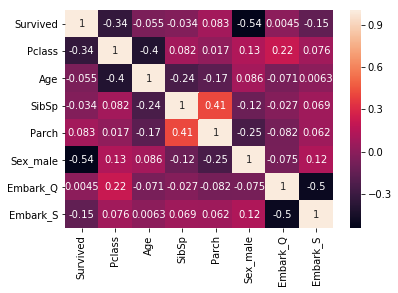

In [21]:
# checking for anymore irrelevant variables
sns.heatmap(df.corr(), annot =True)

In [56]:
# So we should remove the 'Pclass' as well
df.drop('Pclass', axis = 1, inplace=True)

In [57]:
# Now are dataset is all set for modelling as there  are no null and categorical values
x = df.drop('Survived', axis=1)

In [58]:
x.head()

,Age,SibSp,Parch,Sex_male,Embark_Q,Embark_S
0,22.0,1,0,1,0,1
1,38.0,1,0,0,0,0
2,26.0,0,0,0,0,1
3,35.0,1,0,0,0,1
4,35.0,0,0,1,0,1


In [59]:
y = df['Survived']

In [60]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [61]:
# Splitting the dataset
from sklearn.model_selection  import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 100)

In [63]:
# Creating the model
from sklearn.linear_model import LogisticRegression

In [64]:
logreg= LogisticRegression()

In [65]:
# fitting the model to train data
logreg.fit(x_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
# Prediction
y_pred = logreg.predict(x_test)

In [67]:
# checking the accuracy of the model
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [71]:
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))

Confusion Matrix 
 [[139  21]
 [ 33  74]]


In [72]:
print('Accuracy of the model is: ', accuracy_score(y_test, y_pred))

Accuracy of the model is:  0.797752808988764


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       160
           1       0.78      0.69      0.73       107

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267

